In [1]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("D:/IBM_PROJECT/Climate_Actions_AI/data/raw/GlobalTemperatures.csv")

In [15]:
df['dt'] = pd.to_datetime(df['dt'])

In [16]:
df['Year'] = df['dt'].dt.year

In [17]:
df_cleaned = df.dropna(subset=['LandAverageTemperature'])

In [18]:
df_cleaned = df_cleaned[df_cleaned['Year'] >= 1900]

In [19]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
 9   Year               

In [20]:

# Group by year to analyze annual average trends
df_yearly = df_cleaned.groupby('Year')[[
    'LandAverageTemperature',
    'LandMaxTemperature',
    'LandMinTemperature',
    'LandAndOceanAverageTemperature'
]].mean().reset_index()

In [22]:
print(df_yearly.head())

   Year  LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
0  1900                8.501583           14.389500            2.575667   
1  1901                8.541917           14.512167            2.490500   
2  1902                8.304417           14.364250            2.203750   
3  1903                8.220167           14.085750            2.283333   
4  1904                8.090917           14.063667            2.171083   

   LandAndOceanAverageTemperature  
0                       15.143917  
1                       15.073333  
2                       14.958333  
3                       14.836583  
4                       14.810417  


In [21]:
df_yearly.to_csv("cleaned_global_temperatures.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_global_temperatures.csv'")

✅ Cleaned dataset saved as 'cleaned_global_temperatures.csv'


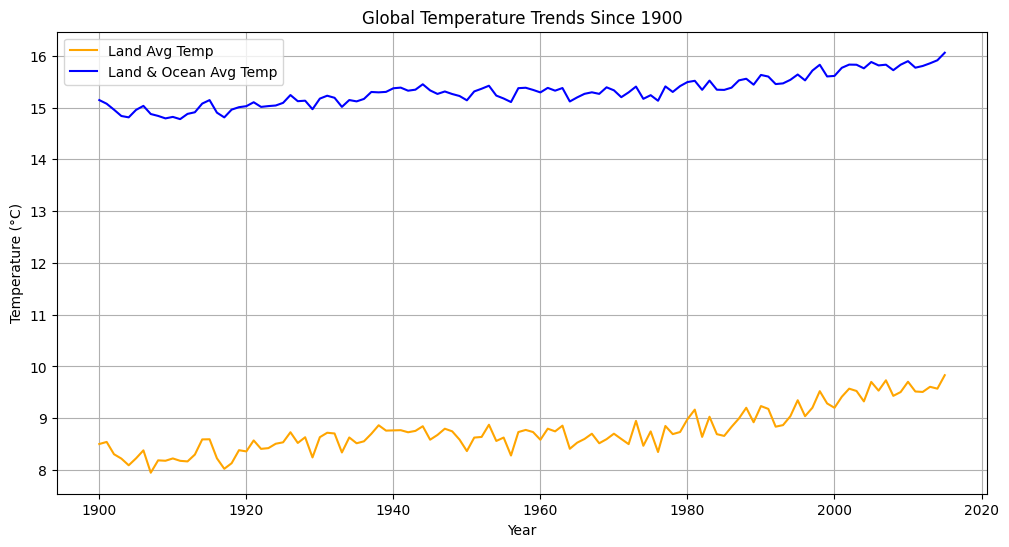

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df_yearly['Year'], df_yearly['LandAverageTemperature'], label='Land Avg Temp', color='orange')
plt.plot(df_yearly['Year'], df_yearly['LandAndOceanAverageTemperature'], label='Land & Ocean Avg Temp', color='blue')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Global Temperature Trends Since 1900')
plt.legend()
plt.grid(True)
plt.show()
